# Exploring data using Pandas

**Before starting with this notebook, the tutors will give a brief introduction**

Now that we have extracted the cell properties we can address some biological questions. The data we have been analyzing is from a synthetic microbial cross-feeding community consisting of two auxotrophic strains of E. coli that can only grow by exchanging Amino-Acids with each other. We are interested in understanding the dynamics of this community, and as a first question we like to know how the frequency of the two cell types changes over time. It is now your task to try to answer this question.

## Import packages

Before starting the code we need to import all the required packages.

We use a number of important Python packages:
- [Numpy](https://numpy.org): Goto package for vector/matrix based calculations (heavily inspired by Matlab)
- [Pandas](https://pandas.pydata.org): Goto package for handling data tables (heavily inspired by R) 
- [Matplotlib](https://matplotlib.org): Goto package for plotting data
- [Seaborn](https://seaborn.pydata.org): Fancy plots made easy (Similar to ggplot in R)
- [pathlib](https://docs.python.org/3/library/pathlib.html): Path handling made easy

In [2]:
#next two lines make sure that Matplotlib plots are shown properly in Jupyter Notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#main data analysis packages
import numpy as np
import pandas as pd

#data plotting packages
import matplotlib
import matplotlib.pyplot as plt
#set default figure size
matplotlib.rc("figure", figsize=(10,5))
import seaborn as sns

#path handling
import pathlib

---
## Import Data
We start by specifying the paths to our data

In [3]:
#Set the path to the folder that contains project data
root = pathlib.Path(pathlib.Path.home(), 
                    'I2ICourse/Project2A/ProcessedData/')

image_name = 'pos0_preproc-rg.tif' #set name of image
data_path = root /  image_name.replace('.tif','_cellprop.pkl')

And we can load the dataframe

In [4]:
df = pd.read_pickle(data_path)
df.head()

,label,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,mean_intensity-0,mean_intensity-1,frame
0,1,950,73.262105,1420.313684,78.168638,16.040507,151.365263,1226.183158,0
1,2,859,64.358556,1461.376019,76.139029,14.897100,138.108265,903.824214,0
2,3,688,87.027616,1401.511628,62.098941,14.490098,173.408430,1072.390988,0
3,4,756,85.839947,978.055556,57.380266,17.228570,158.706349,770.613757,0
4,5,1740,87.659195,1121.195402,164.980811,17.285783,970.826437,158.549425,0


----
## Working with Pandas Dataframes
Now let's analyze some data. You can manipulate Pandas data frames and e.g. extract a column.  
An extracted column is know as a [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series).

In [5]:
cell_length = df['axis_major_length'] #extract a column 
print('data type of extracted column = ', type(cell_length))

data type of extracted column =  <class 'pandas.core.series.Series'>


You can also add new columns, either from a Series, Vector data, or constant value:

In [6]:
cell_length = df['axis_major_length'] #extract a column 
cell_width = df['axis_minor_length'] #extract a column 

#add new column based on ratio of two Series
df["aspect_ratio"] = cell_length/cell_width

#show output
df.head()

,label,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,mean_intensity-0,mean_intensity-1,frame,aspect_ratio
0,1,950,73.262105,1420.313684,78.168638,16.040507,151.365263,1226.183158,0,4.873203
1,2,859,64.358556,1461.376019,76.139029,14.897100,138.108265,903.824214,0,5.110997
2,3,688,87.027616,1401.511628,62.098941,14.490098,173.408430,1072.390988,0,4.285612
3,4,756,85.839947,978.055556,57.380266,17.228570,158.706349,770.613757,0,3.330530
4,5,1740,87.659195,1121.195402,164.980811,17.285783,970.826437,158.549425,0,9.544307


We can get a quick summary of the data using the [`describe` function](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html):

In [7]:
df.describe()

,label,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,mean_intensity-0,mean_intensity-1,frame,aspect_ratio
count,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,3.497500e+04
mean,592.240795,784.538347,632.318348,762.018557,68.911770,14.978334,631.103834,913.437313,14.088663,inf
std,347.248205,381.113552,377.308876,434.358290,32.289976,2.799770,605.354049,579.559100,8.541404,NaN
min,1.000000,1.000000,12.325424,23.292465,0.000000,0.000000,123.750000,129.000000,0.000000,1.000000e+00
25%,294.000000,553.000000,308.552133,379.978000,49.253616,13.480765,137.761780,256.202268,7.000000,3.263186e+00
50%,587.000000,711.000000,597.077425,740.532619,61.987130,14.909089,243.127580,1036.497041,14.000000,4.155263e+00
75%,881.000000,927.000000,943.547273,1152.694215,80.072031,16.536831,1205.758261,1404.735988,21.000000,5.530647e+00
max,1429.000000,7190.000000,1476.714286,1524.057592,613.809106,57.260113,3122.777997,2625.070175,29.000000,inf


We can also filter on rows and for example extract all cells that fulfill a certain requirement, for example we can sort out the largest 0.1% of cells using:

In [8]:
#find 99.9% percentile of cell lengths:
size_tr = df['axis_major_length'].quantile(0.999)

#select biggest cells:  
huge_cells = df[df['axis_major_length']>size_tr]
huge_cells.head(n=10)

,label,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,mean_intensity-0,mean_intensity-1,frame,aspect_ratio
931,932,6570,1402.949772,233.467580,429.083988,37.154564,1795.829833,207.469254,0,11.548621
3,4,4270,27.475176,1077.526230,393.851970,17.842443,1262.127166,158.546370,3,22.073881
1,2,4779,31.472275,1082.933250,456.156054,17.934894,1247.052940,170.166981,4,25.433998
0,1,4846,34.392695,1099.388568,465.917311,17.020571,1185.050970,167.508254,5,27.373777
2,3,4179,33.705193,1142.605647,415.714110,15.304794,1094.493898,166.851161,6,27.162346
1,2,4467,35.514663,1152.909559,439.350989,15.918305,1134.864786,183.023506,7,27.600363
1,2,4944,21.494134,1143.396845,508.002385,15.654690,1088.029531,189.208536,8,32.450492
1,2,4351,20.637325,1173.733165,450.751738,14.761825,986.396920,178.356700,9,30.534959
4,5,4116,16.528426,1183.999757,444.366328,14.078887,1034.379009,176.375364,11,31.562604
4,5,3895,21.027471,1204.685494,418.858990,14.357280,993.157381,183.630552,12,29.173979


For more details of how to use Pandas, see examples below or consult the extensive [documentation online](https://pandas.pydata.org/docs/user_guide/index.html)

----
## Plotting and analyzing cell properties using Pandas & Matplotlib 

### Cell number over time
We will first look at how the number of cells changes over time.

We use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function on the `frame` property to group cells based on their frame. We can then count the number of cells at each frame by calling the `size()` property.

The result is a [Pandas Data Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series). We can directly plot the result using the build-in plot function.

<AxesSubplot:xlabel='frame', ylabel='# of cells'>

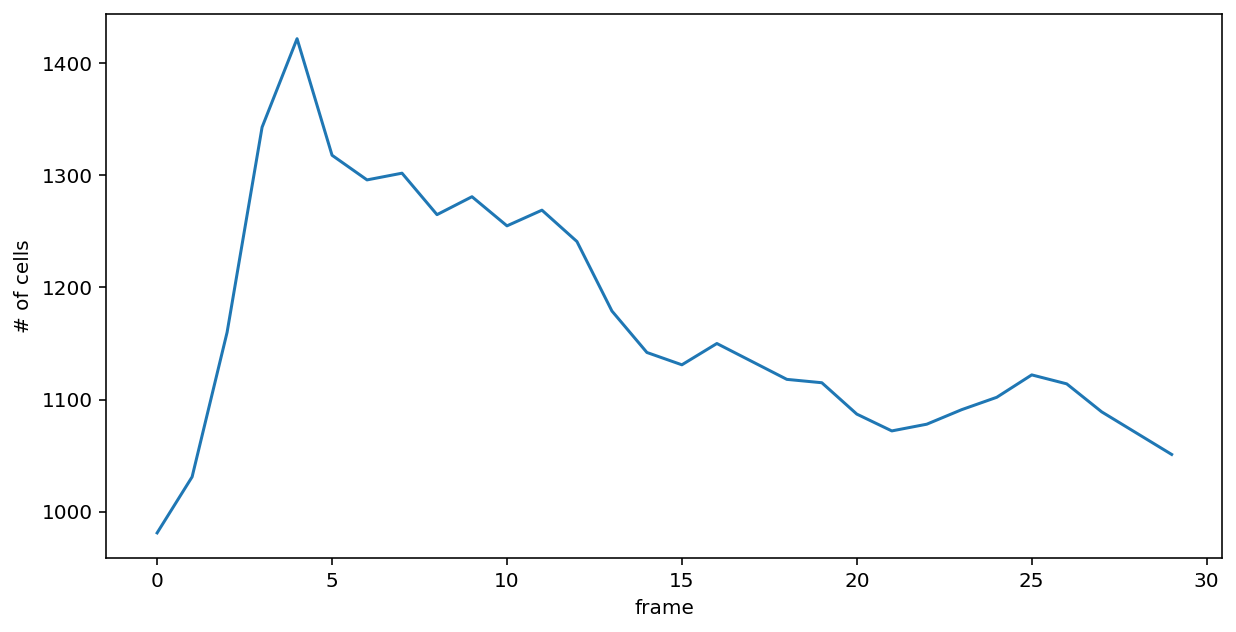

In [9]:
cell_num_t = df.groupby('frame').size() #output is pandas data series
cell_num_t.plot(xlabel='frame',ylabel='# of cells',figsize=(10,5)) #use build in plot function

### Average cell properties over time
Next we will look at how the average properties of a cell, such as their fluorescent intensity, changes over time.

Again we use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function on the `frame` property to group cells based on their frame. We can then calculate the average value for each group by calling the `mean()` function.
The output in this case is a Pandas dataframe, with shows the average value over all cells contained in a given frame (each row is a frame). 

[Here](https://pbpython.com/groupby-agg.html) you can find an overview of how to group and aggregate data in Pandas.

In [10]:
av_prop = df.groupby('frame').mean()
av_prop['frame'] = av_prop.index
av_prop.head()

,label,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,mean_intensity-0,mean_intensity-1,aspect_ratio,frame
frame,,,,,,,,,,
0,491.000000,781.744139,761.812993,942.757719,65.906839,15.462280,432.533359,1006.273871,4.284707,0
1,516.874879,766.479146,666.148824,882.643737,64.035481,15.483548,424.224212,1030.650997,4.153368,1
2,581.631897,759.642241,658.026011,822.048494,65.221437,15.102125,400.289870,1056.955742,4.340561,2
3,676.193596,727.594937,679.863313,793.823839,64.560940,14.548891,378.738352,1142.906333,NaN,3
4,716.386779,663.352321,668.796141,778.406594,58.411786,14.611676,412.827977,1280.988894,NaN,4


We can plot the result in two ways: using [Matplotlib](https://matplotlib.org/stable/index.html) or [seaborn](https://seaborn.pydata.org/index.html).

Matplotlib is a lower level package, giving you a lot of freedom but requiring quite a bit of code to make things look nice.

Seaborn is a higher level package, making it easier to make nice looking figures, at the cost of some flexibility.

First we show you Matplotlib:

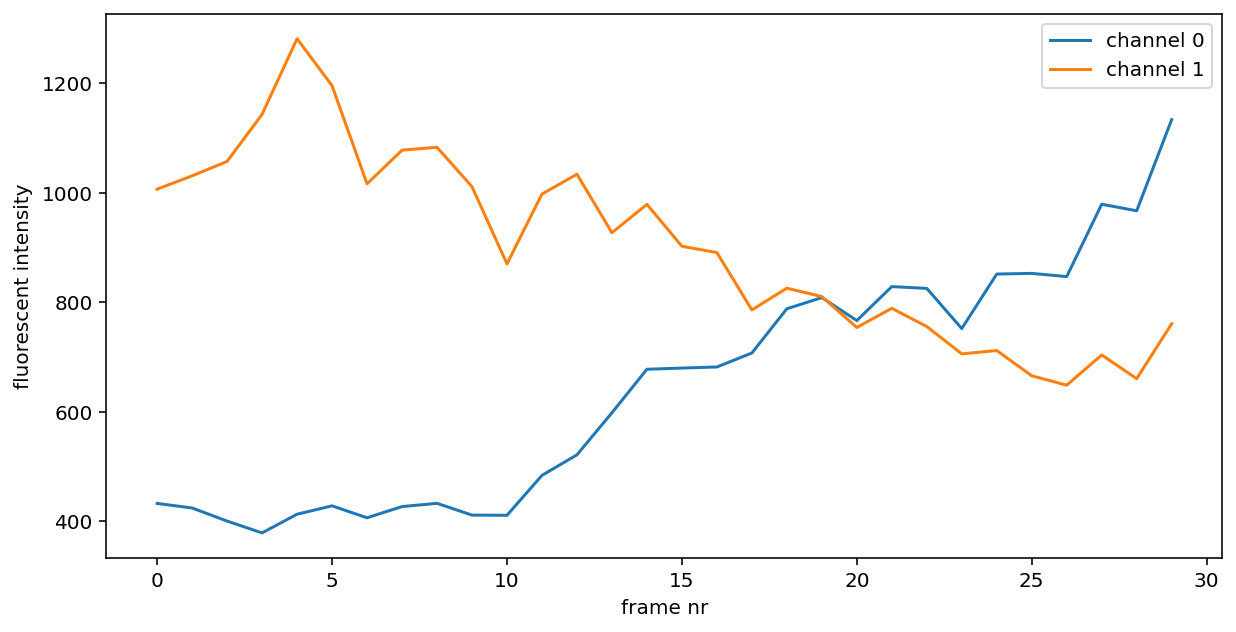

In [11]:
#plot with Matplotlib
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(av_prop['frame'],av_prop['mean_intensity-0'],label='channel 0')
ax.plot(av_prop['frame'],av_prop['mean_intensity-1'],label='channel 1')
ax.set_xlabel('frame nr')
ax.set_ylabel('fluorescent intensity')
ax.legend()

----
## Plotting with Seaborn

Now let's look at Seaborn:

Text(0, 0.5, 'fluorescent intensity')

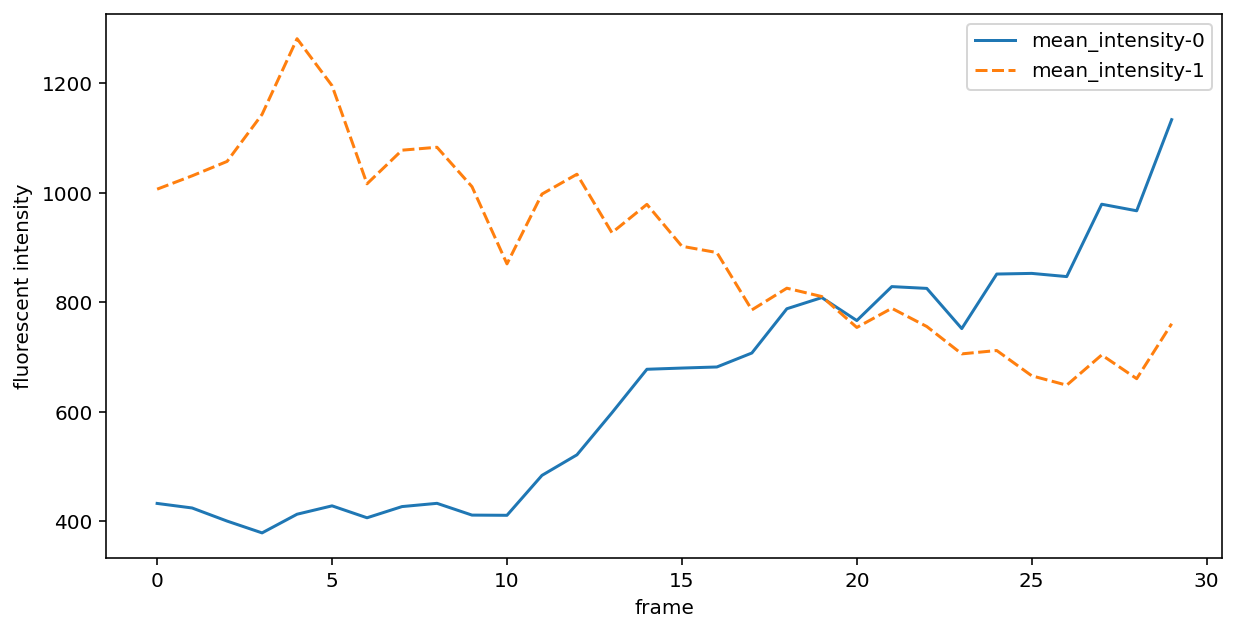

In [12]:
#plot with Seaborn
p = sns.lineplot(data=av_prop[["mean_intensity-0", "mean_intensity-1"]])
p.set_ylabel("fluorescent intensity")

Similarly we can look at distributions and scatter plots:

<AxesSubplot:xlabel='mean_intensity-0', ylabel='mean_intensity-1'>

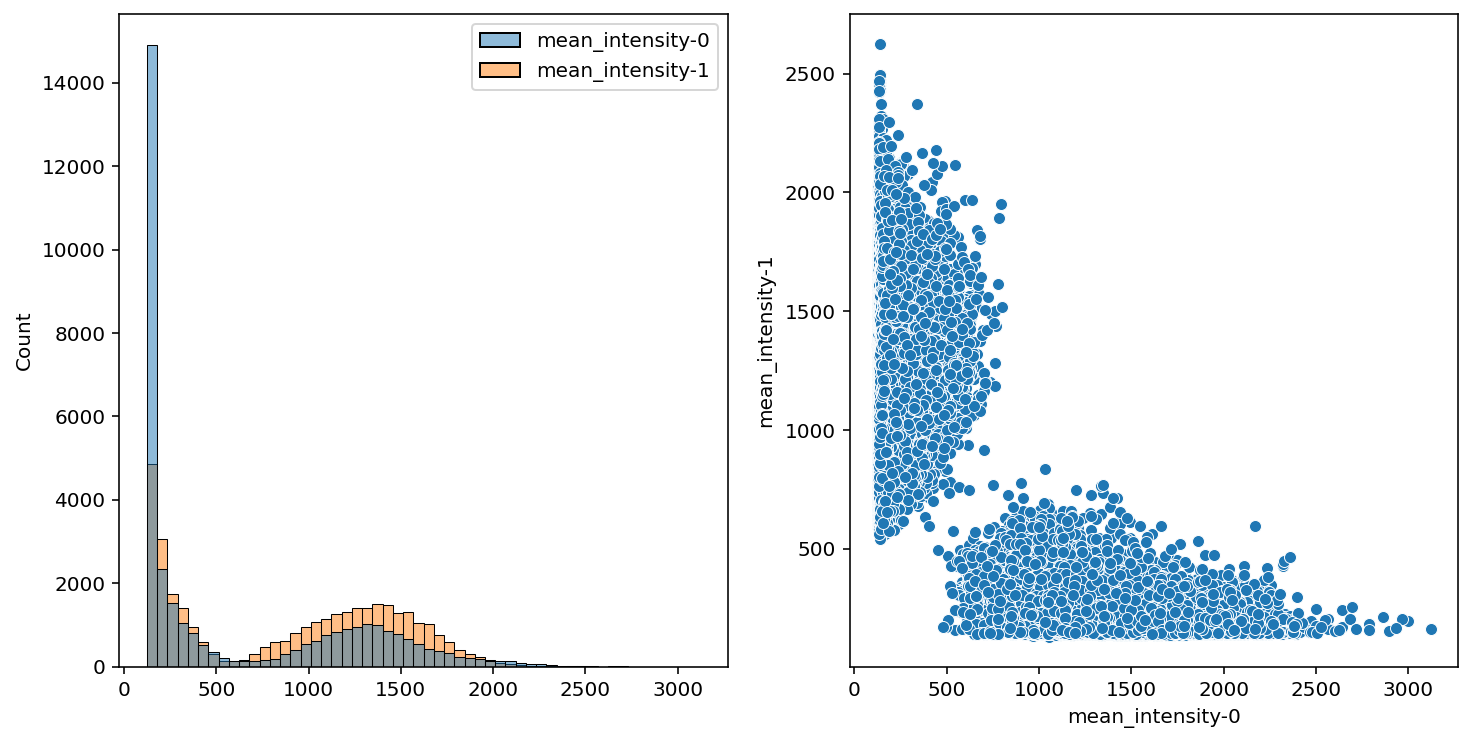

In [13]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.histplot(ax=axs[0], data=df[["mean_intensity-0", "mean_intensity-1"]])
sns.scatterplot(ax=axs[1], data=df, x="mean_intensity-0", y="mean_intensity-1")

Seaborn has also many mare advanced functionalities. For example you can automatically make a facet plot to make a separate plot for each group. Here we visualize how the distribution of RFP intensities changes over time:

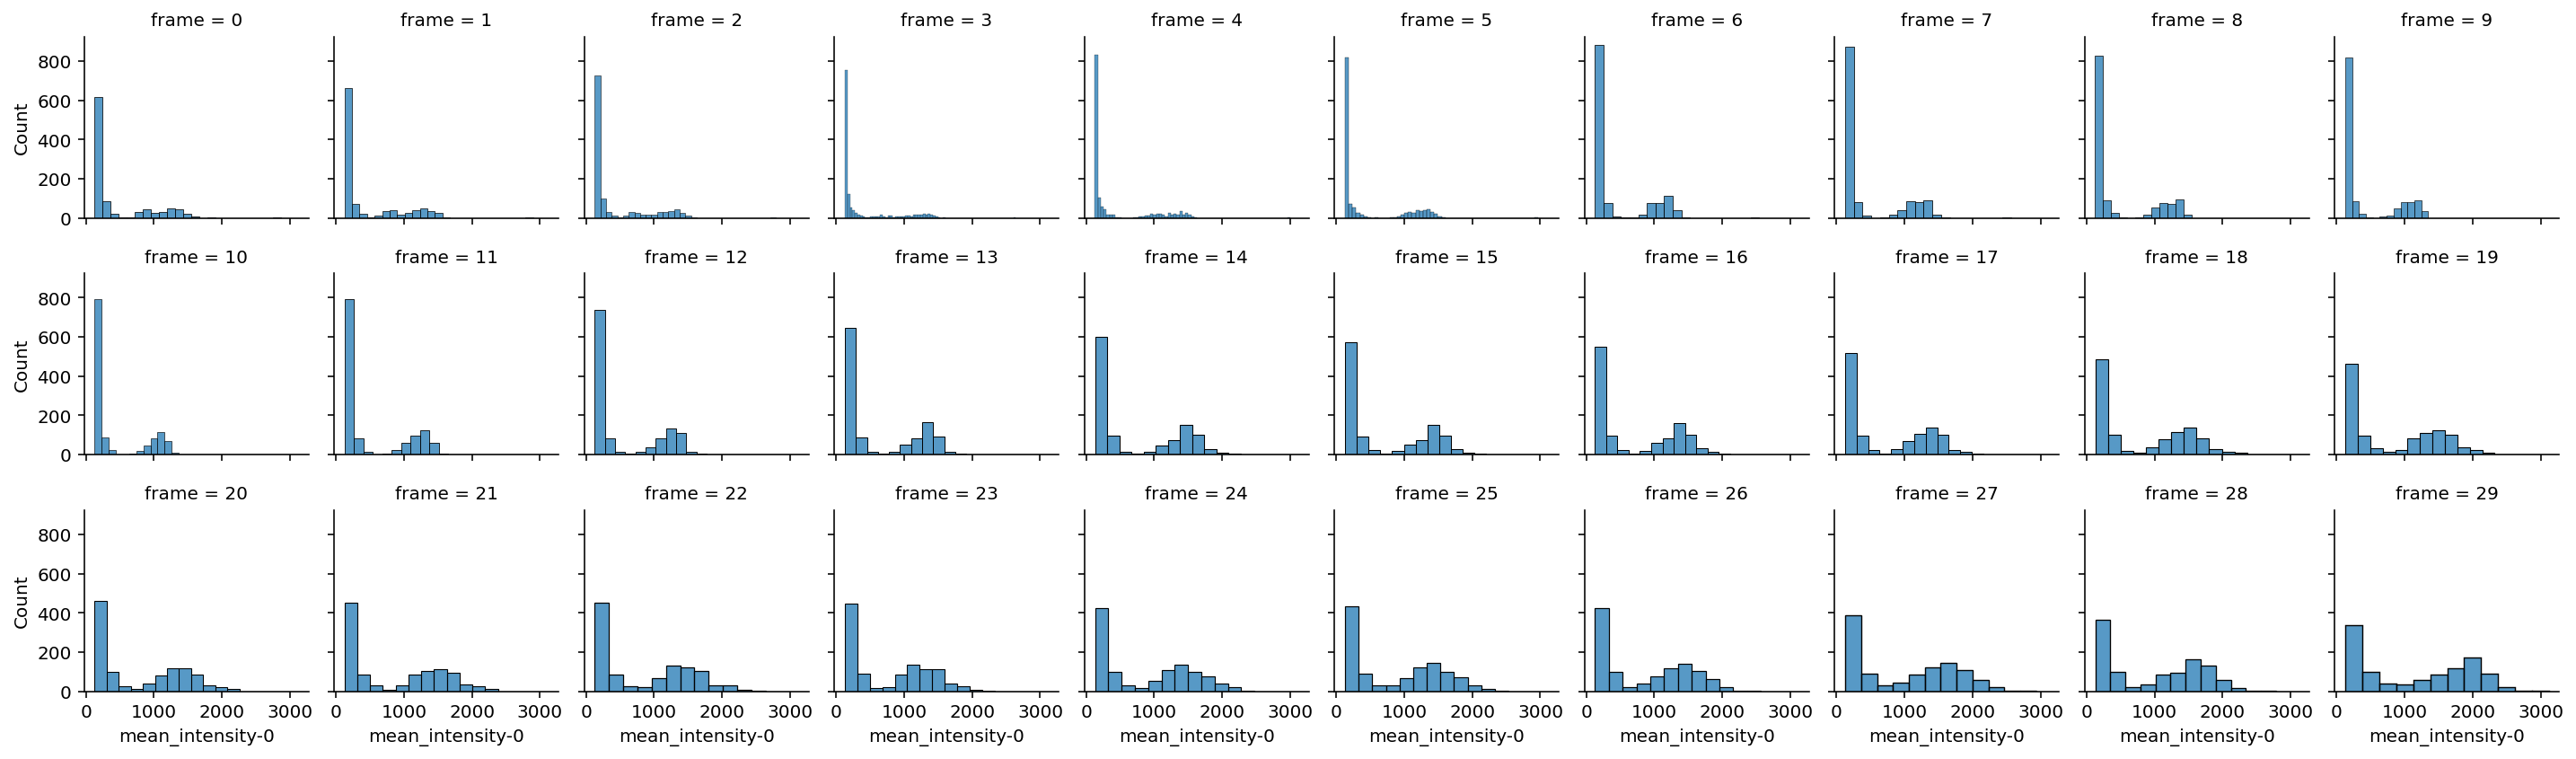

In [14]:
g = sns.FacetGrid(df, col="frame", col_wrap=10, height=2)
g.map(sns.histplot, "mean_intensity-0")

For more details, you can consult the [Example gallery](https://seaborn.pydata.org/examples/index.html) or [Tutorial section](https://seaborn.pydata.org/tutorial.html) on the Seaborn website.

---
## Data analysis: Quantifying Community Dynamics

> ### Exercise
> We are interested in the dynamics of the community, and would like to know how the fraction of red cells changes over time.   
> Try to come up with a way to calculate this.
> 
> Hints:
> - Think about how you can tell red and green cells apart in a reliable way
> - Classify cells as either red or green
> - Calculate the fraction of red cells over time

In [15]:
#enter code here

---

### Solution 1
To see the solution, uncomment (remove `#`) the `load` line below and run the cell twice (first time will load the code second time will run it)

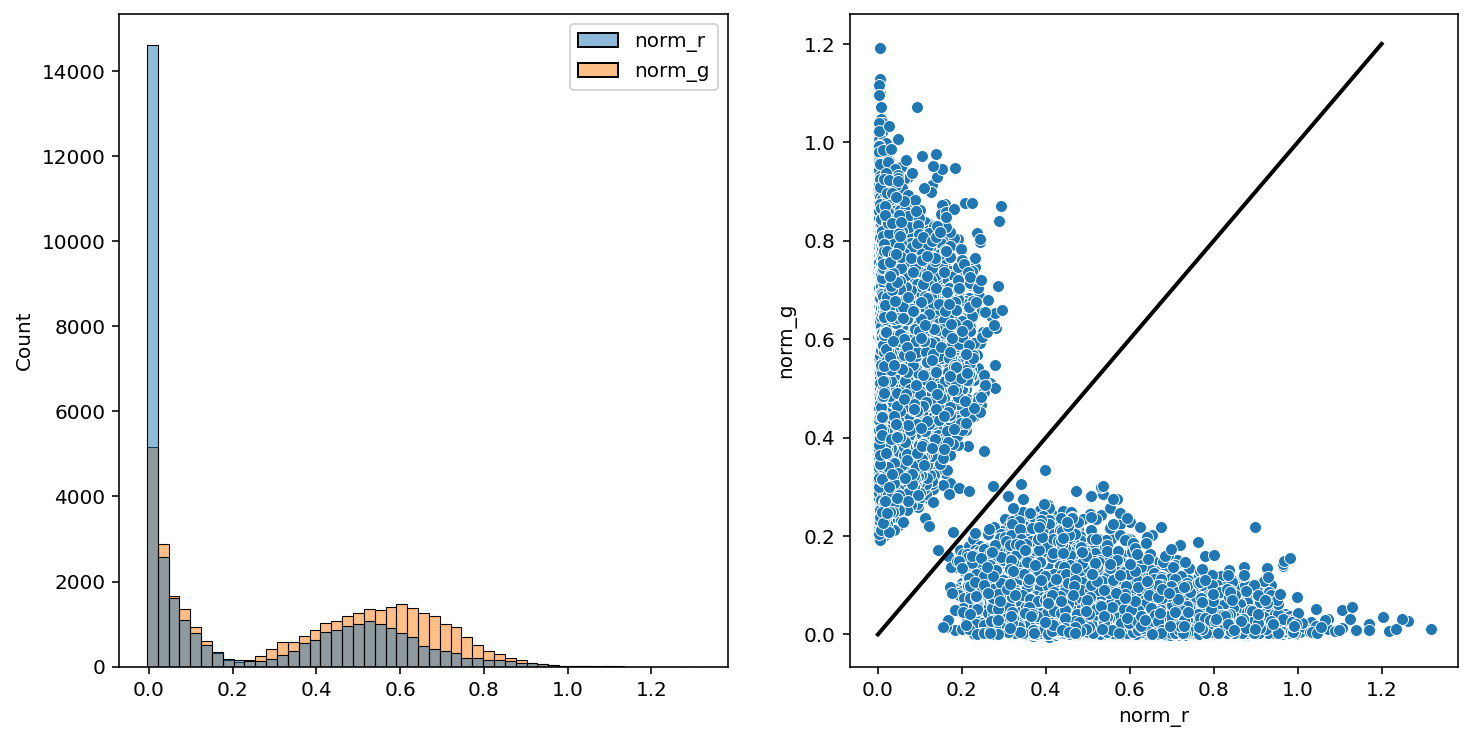

<AxesSubplot:xlabel='frame'>

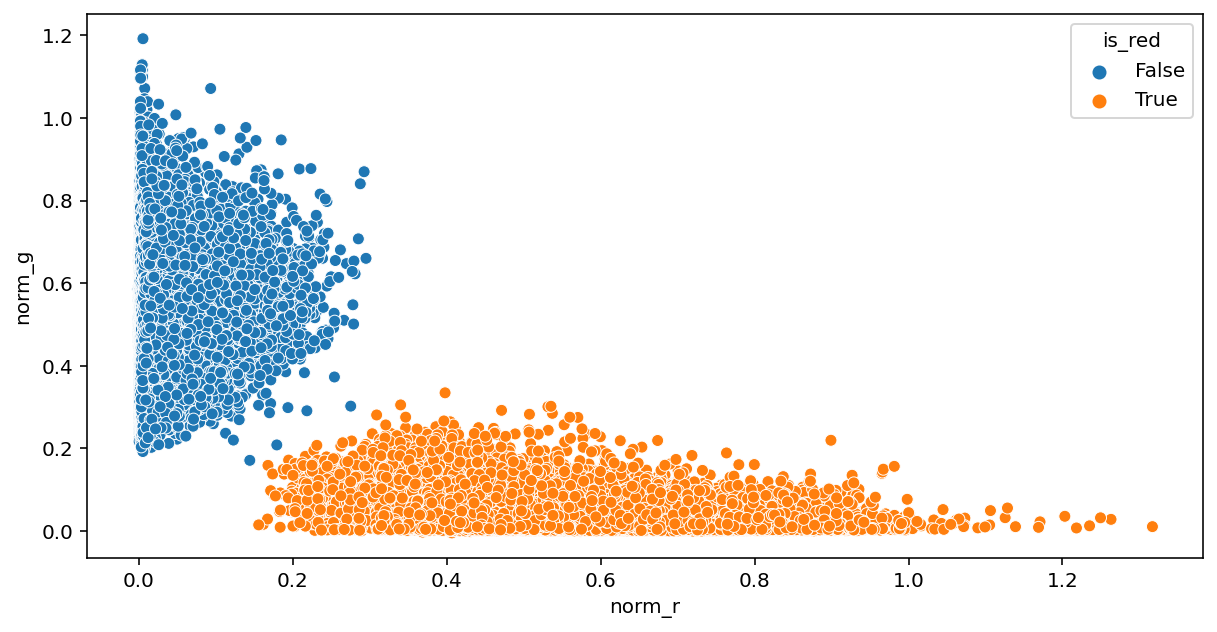

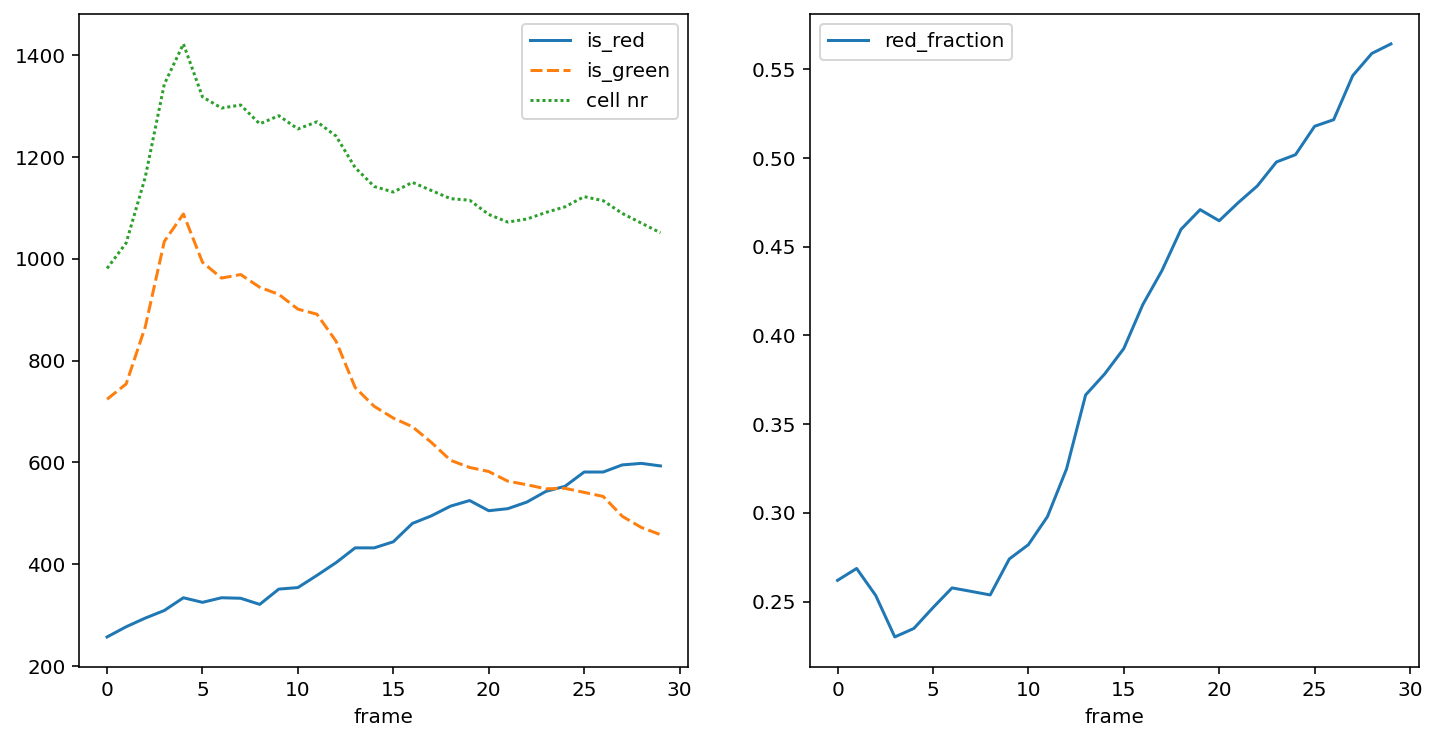

In [19]:
# %load ../Solutions/p0_classify_sol1.py
#Use normalization and fluorescent ratio

#define function to normalize data based on quantiles
#this is more robust than min-max normalization
def norm_data(data, clip=[1E-3, 0.999], bounded=False):
    lims = np.quantile(data, clip)
    
    data_clipped = (data - lims[0]) / (lims[1] - lims[0])
        
    if bounded:
        data_clipped[data_clipped<0] = 0
        data_clipped[data_clipped>1] = 1
                
    return data_clipped
 
#normalize the red and green channel    
norm_red = norm_data(df["mean_intensity-0"])
norm_green = norm_data(df["mean_intensity-1"])

#create dataframe with normalized intensities
norm_fluor = pd.concat([norm_red,norm_green], keys=['norm_r','norm_g'], axis=1) 

#plot normalized intensities in scatter plot
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.histplot(ax=axs[0], data=norm_fluor)
sns.scatterplot(ax=axs[1], data=norm_fluor, x="norm_r", y="norm_g")

#add line x=y
axs[1].plot([0, 1.2], [0, 1.2], linewidth=2, color='k')
plt.show()

#classify cells based on highest normalized intensity
norm_fluor['is_red'] = norm_red > norm_green
norm_fluor['is_green'] = norm_red <= norm_green
norm_fluor['cell nr'] = 1
norm_fluor['frame'] = df['frame'] 

#create scatter plot, color points by classification
sns.scatterplot(x=norm_fluor['norm_r'], y=norm_fluor['norm_g'], hue=norm_fluor['is_red'])

#calculate number of red and green cells over time
cell_type_t = norm_fluor.groupby('frame').sum()

#calculate fraction of red cells
cell_type_t['red_fraction'] = cell_type_t['is_red'] / cell_type_t['cell nr']

#plot fraction of red cells over time
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(ax=axs[0], data=cell_type_t[['is_red','is_green','cell nr']])
sns.lineplot(ax=axs[1], data=cell_type_t[['red_fraction']])


### Solution 2
To see the solution, uncomment (remove `#`) the `load` line below and run the cell twice (first time will load the code second time will run it)

<AxesSubplot:xlabel='frame'>

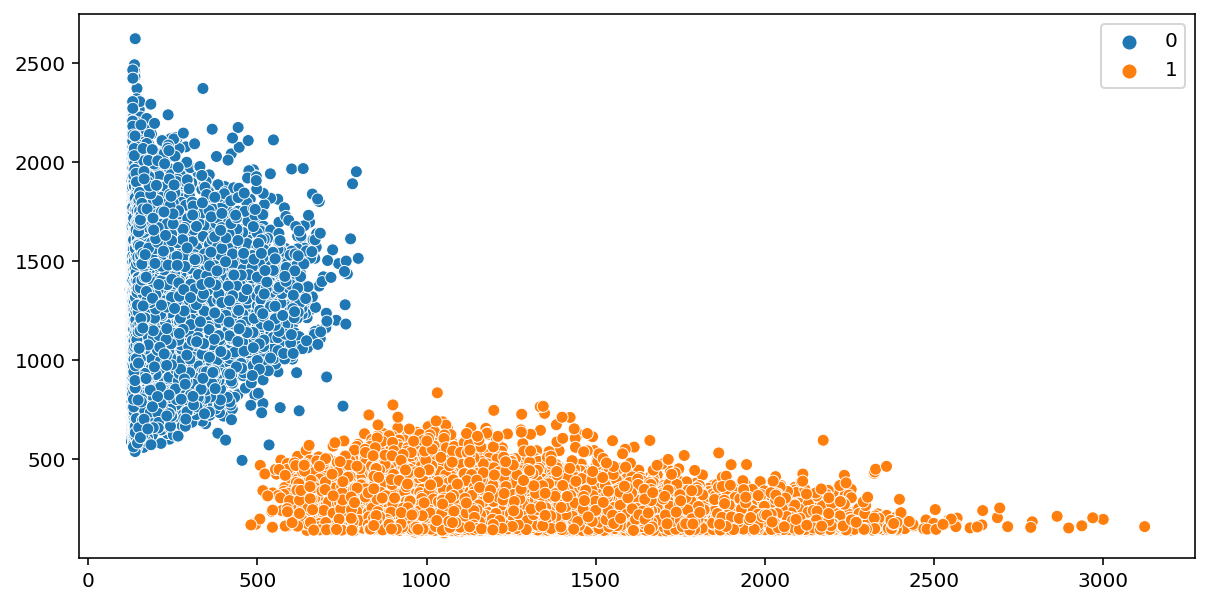

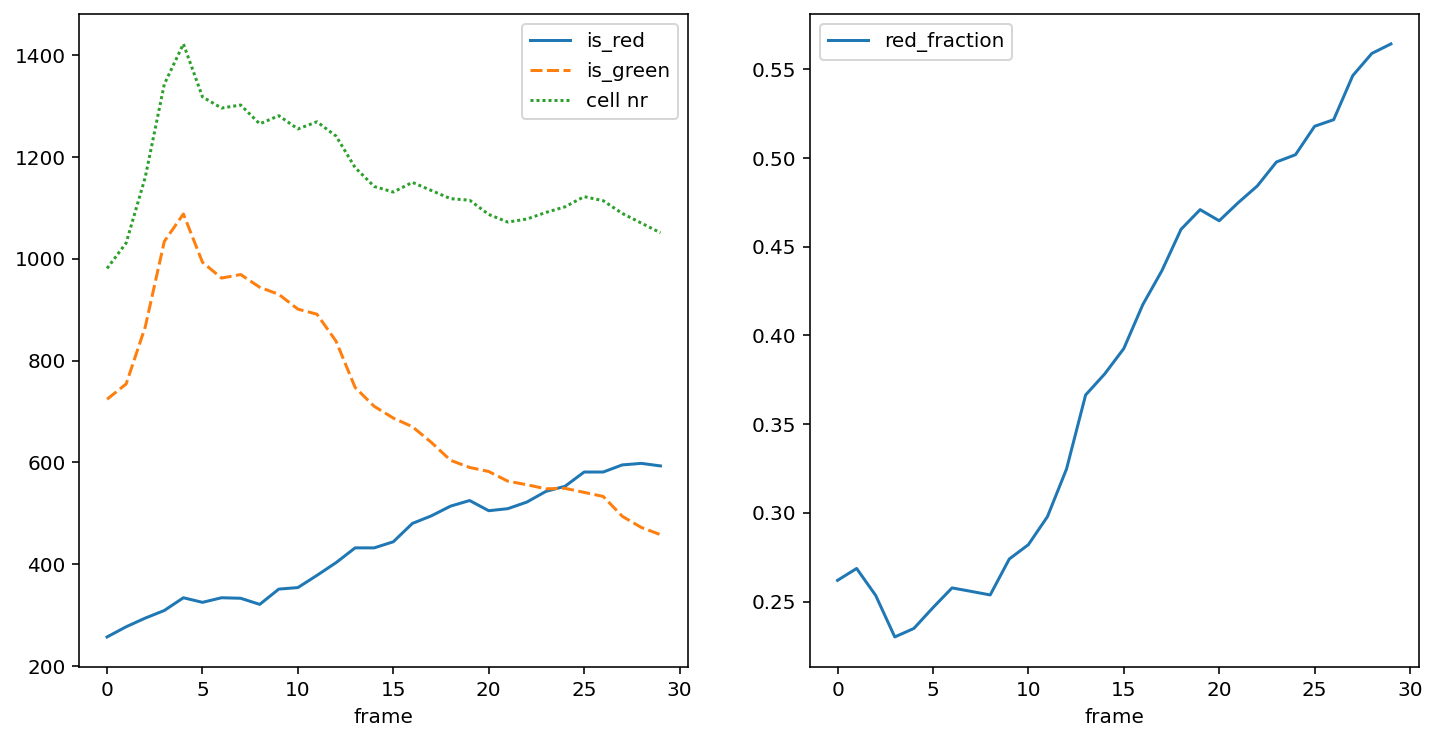

In [20]:
# %load ../Solutions/p0_classify_sol2.py
#solution 2 using K-means clustering
from sklearn.cluster import KMeans 

#extract red and green intensities and create new data frame
norm_fluor = df[["mean_intensity-0","mean_intensity-1"]].copy()

#convert to numpy
norm_fluor_np = norm_fluor.to_numpy()

#do k-means clustering
kmeans_fit = KMeans(n_clusters=2, random_state=0).fit(norm_fluor_np)
cell_class = kmeans_fit.labels_

#show clustering outcome in plot
sns.scatterplot(x=norm_fluor_np[:,0], y=norm_fluor_np[:,1], hue=cell_class)

#classify cells 
norm_fluor['is_red'] = cell_class
norm_fluor['is_green'] = np.logical_not(cell_class)
norm_fluor['cell nr'] = 1
norm_fluor['frame'] = df['frame'] 

#calculate fraction of red cells over time 
cell_type_t2 = norm_fluor.groupby('frame').sum()
cell_type_t2['red_fraction'] = cell_type_t2['is_red'] / cell_type_t2['cell nr']

#plot fraction of red cells over time
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(ax=axs[0], data=cell_type_t2[['is_red','is_green','cell nr']])
sns.lineplot(ax=axs[1], data=cell_type_t2[['red_fraction']])